In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot

%matplotlib inline

In [12]:
conda install tensorflow

     -------------------------------------- 272.8/272.8 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 4.6 MB/s eta 0:00:00
     ------------------------------------ 420.6/420.6 kB 795.4 kB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('../TensorFlow_FILES/DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

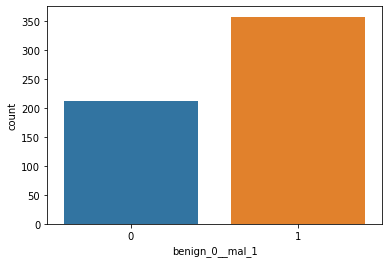

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

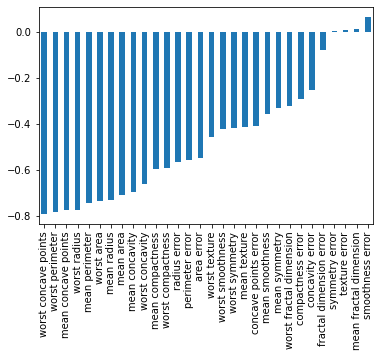

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

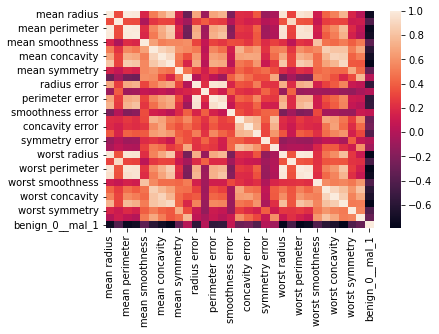

In [15]:
sns.heatmap(df.corr())

In [3]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 25ms/step - loss: 0.7081 - val_loss: 0.6717
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6577 - val_loss: 0.6311
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6177 - val_loss: 0.5906
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5714 - val_loss: 0.5381
Epoch 5/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5131 - val_loss: 0.4705
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4502 - val_loss: 0.4075
Epoch 7/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3944 - val_loss: 0.3532
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3462 - val_loss: 0.3112
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3062 - val_loss: 0.2777
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2787 - val_loss: 0.2501
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0366 - val_loss: 0.1417
Epoch 164/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0340 - val_loss: 0.1461
Epoch 165/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.1492
Epoch 166/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0323 - val_loss: 0.1420
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0352 - val_loss: 0.1404
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0331 - val_loss: 0.1455
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0328 - val_loss: 0.1498
Epoch 170/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0324 - val_loss: 0.1376
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0349 - val_loss: 0.1593
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.1448
Epo

Epoch 244/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0287 - val_loss: 0.1930
Epoch 245/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0296 - val_loss: 0.1569
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.1677
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.1670
Epoch 248/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0263 - val_loss: 0.1635
Epoch 249/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0250 - val_loss: 0.1622
Epoch 250/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0240 - val_loss: 0.1675
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.1704
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.1686
Epoch 253/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0248 - v

14/14 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.2060
Epoch 405/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0129 - val_loss: 0.2254
Epoch 406/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.2161
Epoch 407/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.2135
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.2179
Epoch 409/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0124 - val_loss: 0.2097
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.2165
Epoch 411/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0186 - val_loss: 0.2095
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.2239
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.2202
E

14/14 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.2887
Epoch 567/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.2917
Epoch 568/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.2900
Epoch 569/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.2909
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.2938
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.2947
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.2932
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.2998
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2958
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.3023
Epoc

In [17]:
losses = pd.DataFrame(model.history.history)

<Axes: >

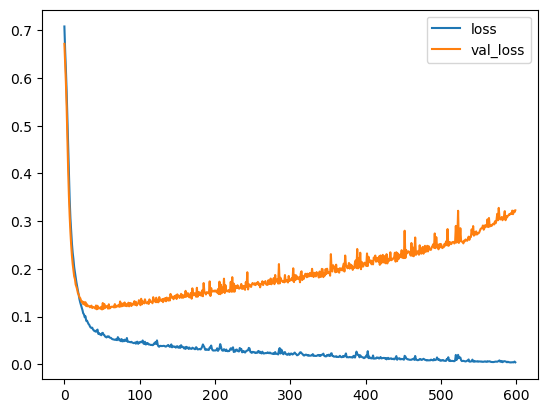

In [18]:
losses.plot()

In [19]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [22]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6855 - val_loss: 0.6632
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6352 - val_loss: 0.6082
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5802 - val_loss: 0.5546
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5283 - val_loss: 0.4963
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4706 - val_loss: 0.4361
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4116 - val_loss: 0.3781
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3595 - val_loss: 0.3298
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3167 - val_loss: 0.2925
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2838 - val_loss: 0.2592
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.2563 - val_loss: 0.2342
Epoch 

In [24]:
early_losses = pd.DataFrame(model.history.history)

<Axes: >

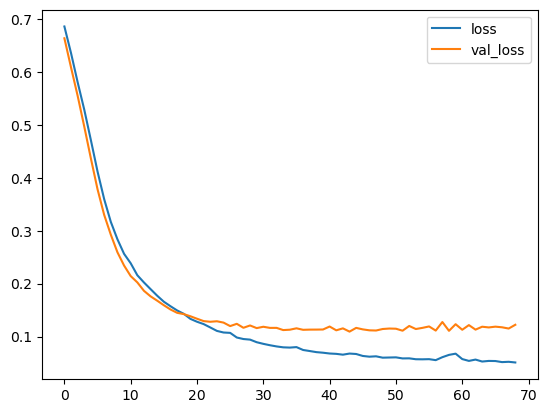

In [25]:
early_losses.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [30]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 24ms/step - loss: 0.7067 - val_loss: 0.6844
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6895 - val_loss: 0.6678
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6699 - val_loss: 0.6534
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6559 - val_loss: 0.6358
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6335 - val_loss: 0.6118
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6193 - val_loss: 0.5842
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6084 - val_loss: 0.5543
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5793 - val_loss: 0.5227
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5637 - val_loss: 0.4931
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5374 - val_loss: 0.4677
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1142 - val_loss: 0.1102
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1069 - val_loss: 0.1043
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1284 - val_loss: 0.1004
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0951 - val_loss: 0.1124
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1204 - val_loss: 0.1116
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1045 - val_loss: 0.0982
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1212 - val_loss: 0.1020
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1070 - val_loss: 0.1049
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1062 - val_loss: 0.1020
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0976 - val_loss: 0.1069


In [31]:
drop_losses = pd.DataFrame(model.history.history)

<Axes: >

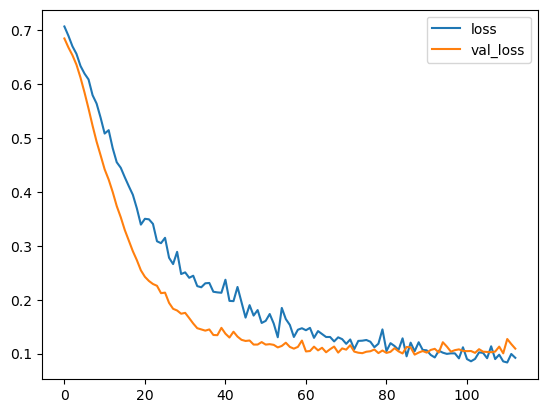

In [32]:
drop_losses.plot()

In [34]:
pred = np.argmax(model.predict(X_test), axis=-1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 1s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [2]:
import numpy as np

In [3]:
np.convolve((1,2,3),(4,5,6))

array([ 4, 13, 28, 27, 18])

In [4]:
def conv(a,b):
    a = list(map(int, input("First list:").split()))
    b = list(map(int, input("Second list:").split()))
    
    

In [7]:
%%timeit
np.convolve((1,2,3),(4,5,6))

6.11 µs ± 292 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
import scipy.signal

In [9]:
%%timeit
scipy.signal.fftconvolve((1,2,3),(4,5,6))

106 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
